# -------------------------PROJET 5 ---------------------------------

# ---------------Optimiser la gestion des données---------------- 

![logo](logo2.png)

Auteur: Lauren GUIOT

Date= 9 octobre 2021

# Introduction

Cette analyse a pour but d'analyser les différents produits vendus sur le site Internet qui étaient encore à ce jour très peu visible par les différents services. Cette analyse permettra de mettre en lumière les produits les plus vendus ainsi que la variété de prix proposés sur le site internet afin de détecter d'éventuelles anomalies. 

Le nettoyage d'un jeu de données est une étape essentielle dans l'exploitation de celles-ci. Elle permet de fiabiliser les données et éviter une analyse erronée des données.

Objectif du projet:
* Réaliser une analyse univariée pour interpréter des données
* Classifier différents types de données
* Gérer les erreurs et les incohérences présentes sur des données stockées


## Sommaire
* [I. Importation](#I)
* [II. Découverte des Données](#II)
    * [a) Inspection des données](#II.a)
        * [Visualiser les tables](#II.a.1)
        * [Vérifier les types](#II.a.2)
        * [Vérifier les données absentes](#II.a.3)
        * [Vérifier l'unicité des clés et les valeurs Uniques](#II.a.4)
        * [Analyser les Doublons](#II.a.5)
        * [Analyser les Tables globales](#II.a.6)
        
    * [b) Nettoyage des données](#II.b)
        * [Supprimer les colonnes inutiles](#II.b.1)
        * [Supprimer les Clés manquantes SKU](#II.b.2)
        * [Supprimer les lignes liées à l'image dans WEB](#II.b.3)
        * [Modifier les types](#II.b.4)
        * [Supprimer les valeurs manquantes](#II.b.5)
        * [Modifier le nom des colonnes](#II.b.6)
    * [c) Rapprochement des tables](#II.c)
        * [lier les tables ERP, liaison et Web](#II.c.1)
        * [Vérifier la jointure](#II.c.2)
        * [Supprimer les produits sans clé SKU](#II.c.3)
        * [Supprimer les produits non commercialisés sur le Web](#II.c.4)
        * [Vérifier l'unicité des clés après rapprochement](#II.c.5)
* [III. Exploration des données](#III)
    * [a) Calcul du Chiffre d'affaire](#III.a)
        * [Chiffre d'affaire par produit](#III.a.1)
        * [Chiffre d'affaire Total](#III.a.2)
    * [b) Analyse des prix](#III.b)
        * [Valeurs Extrêmes](#III.b.1)
        * [Centrales](#III.b.2)
        * [Forme](#III.b.3)
        * [Concentration](#III.b.4)
        * [Dispertion](#III.b.5)
            * [Ecart Type Empirique](#III.b.5.1)
            * [Ecart Interquartile](#III.b.5.2)
            * [Outliers](#III.b.5.3)
* [CONCLUSION](#IV)

# I. Importation <a class="anchor" id="I"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
erp= pd.read_excel("erp.xlsx")
web= pd.read_excel("web.xlsx")
liaison= pd.read_excel("liaison.xlsx")
pd.set_option('display.max_columns', None)

# II. Découverte des données <a class="anchor" id="II"></a>

## a) Inspection des données <a class="anchor" id="II.a"></a>

### Visualiser les différentes tables <a class="anchor" id="II.a.1"></a>

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


On retrouve dans ce tableau le descriptif de production du produit tel que l'ID du produit proposé avec l'information s'il est proposé en en vente en ligne, son prix, son état des stocks et sa disponibilité.

In [4]:
web.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Ce tableau regroupe le nombre de ventes en ligne par produit nommé ainsi que de nombreuses informations annexes telle que la taxe, la date de mise en ligne, etc.. Étant donnés que le tableau est regroupé par produit, il ne nous est pas possible de suivre l'évolution des ventes dans le temps. Les données proviennent de l'outils CMS.

In [5]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Ce tableau de liaison permet de faire la liaison entre le descriptif du produit et sa commercialisation en ligne.
Coté id_web, les références de la base de la boutique en ligne ne possèdent pas toutes les références de la base produit. La liste n'est donc pas exhaustive. 
Cette liste a été créé par sylvie.

### Vérifier le type de données<a class="anchor" id="II.a.2"></a>

In [6]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


ID en integer à modifier en object. aucun NULL 825 lignes

In [7]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

On remarque que pas mal de variables ont des NULL. 
Post_authors devrait être en object et non float.

In [8]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


Id en integer à modifier en object. On remarque 825 non Null en product id équivalent au nombre présent dans Erp.
Par contre, on a seulement 734 non null en id web et 1428 pour SKU Web....

### Vérifier le nombre de NaN et sa proportion. <a class="anchor" id="II.a.3"></a>

In [9]:
(erp.isna().sum() / erp.shape[0]).sort_values(ascending=True)

product_id        0.0
onsale_web        0.0
price             0.0
stock_quantity    0.0
stock_status      0.0
dtype: float64

Aucun NaN de présent dans cette Table ERP.

In [10]:
(web.isna().sum() / web.shape[0]).sort_values(ascending=True)

virtual                  0.000000
downloadable             0.000000
rating_count             0.000000
comment_count            0.054858
post_modified_gmt        0.054858
ping_status              0.054858
comment_status           0.054858
post_status              0.054858
post_parent              0.054858
post_title               0.054858
guid                     0.054858
post_date                0.054858
post_name                0.054858
post_author              0.054858
menu_order               0.054858
post_type                0.054858
total_sales              0.054858
average_rating           0.054858
post_date_gmt            0.054858
post_modified            0.054858
sku                      0.056180
tax_status               0.526768
post_excerpt             0.526768
post_mime_type           0.528090
post_content_filtered    1.000000
post_content             1.000000
tax_class                1.000000
post_password            1.000000
dtype: float64

In [11]:
web[['sku','post_name']].isna().sum().sort_values(ascending=True)

post_name    83
sku          85
dtype: int64

La plupart des colonnes ont seulement 5% de données manquantes, mais certaines colonnes ont 50% de leur donnée inconnues voir même 100% notamment sur le password, la tax, le content. On remarque que le SKU a tout de même 5% de NaN. Donc 5% des valeurs n'ont pas de clés.

In [12]:
(liaison.isna().sum() / liaison.shape[0]).sort_values(ascending=True)

product_id    0.000000
id_web        0.110303
dtype: float64

11% des Id_web sont en Nan sur les 825 products Id.

<AxesSubplot:>

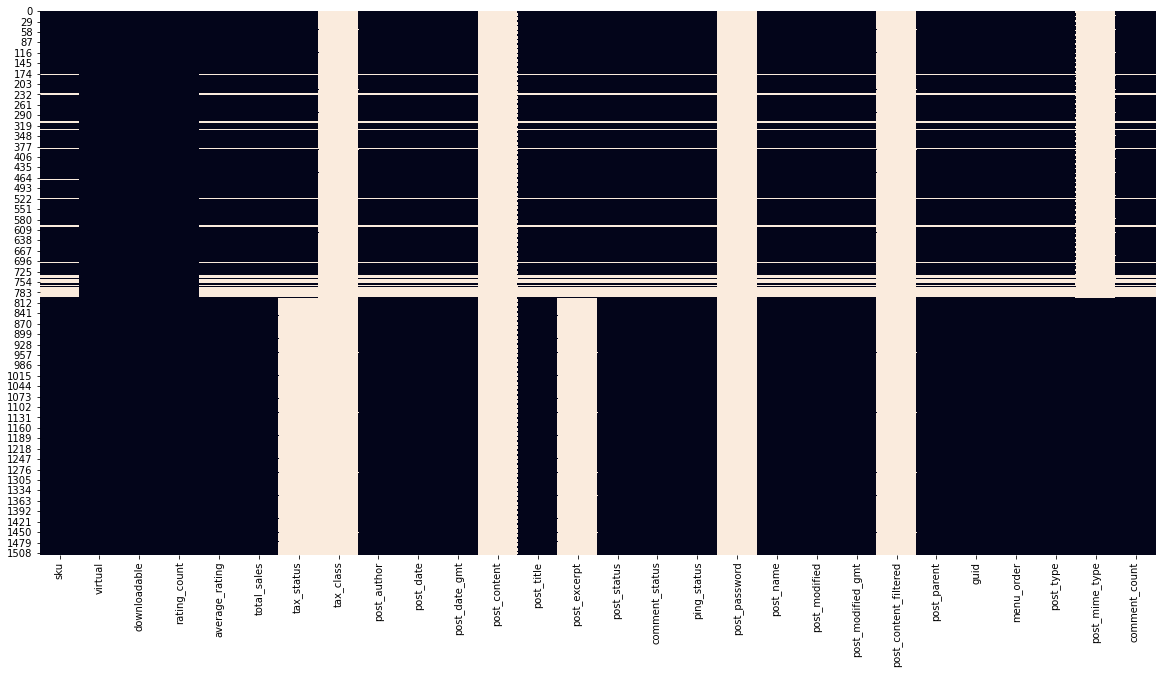

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(web.isna(), cbar=False)

On remarque que les données sans références SKU ont en générale très peu de renseignement sur toutes colonnes hormis dans virtual, downloadable et rating count. Certaines données ont été fournis seulement dans la première moitié des valeurs telle que la tax status et le post excerpt. Et d'autres, inversement ont été fournis que pour la 2eme partie avec le post mime type. Évolution des informations fournis dans le temps.

### Analyses de l'unicité des clés et des différentes valeurs Uniques <a class="anchor" id="II.a.4"></a>

In [14]:
print('erp=',erp.drop_duplicates('product_id').shape[0] == erp.shape[0],', ',
    'web=',web.drop_duplicates('sku').shape[0] == web.shape[0],', ',
      'liaison=',liaison.drop_duplicates().shape[0] == liaison.shape[0])

erp= True ,  web= False ,  liaison= True


On remarque donc qu'il y a bien une unicité des clés pour les tables ERP et Liaison. Par contre ce n'est pas le cas pour la table Web.
On va analyser de plus près les différentes valeurs Uniques de chaque table.

In [15]:
def valunique(tab):
    for i in tab:
        unique = tab[i].unique()
        if len(unique) < 100 :
            print(i, unique)
        else :
            print(i, len(unique), "valeurs différentes" "\n\n")  

In [16]:
valunique(erp)

product_id 825 valeurs différentes


onsale_web [1 0]
price 381 valeurs différentes


stock_quantity 128 valeurs différentes


stock_status ['outofstock' 'instock']


On constate bien qu'il y a près de 825 produits différents avec des Id uniques sur les 825 lignes sans NaN. Donc toutes les clés seraient donc bien uniques.

Valeur on_sale= 1 et 0.
stock_status= outofstock et instock

In [17]:
valunique(web)

sku 715 valeurs différentes


virtual [0]
downloadable [0]
rating_count [0]
average_rating [ 0. nan]
total_sales [10.  6.  0.  3.  7. 14.  1. 23. 18. 11.  9. 20. 19. 62.  4. 12.  5.  2.
 40. 30. 87. 36. 43. 13. 17. 42.  8. 46. 16. 15. nan 96. 32. 38. 29. 33.
 22. 24. 26. 21. 41. 37.]
tax_status ['taxable' nan]
tax_class [nan]
post_author [ 1.  2. nan]
post_date 717 valeurs différentes


post_date_gmt 717 valeurs différentes


post_content [nan]
post_title 714 valeurs différentes


post_excerpt 680 valeurs différentes


post_status ['publish' nan]
comment_status ['closed' nan]
ping_status ['closed' nan]
post_password [nan]
post_name 717 valeurs différentes


post_modified 590 valeurs différentes


post_modified_gmt 590 valeurs différentes


post_content_filtered [nan]
post_parent [ 0. nan]
guid 1431 valeurs différentes


menu_order [ 0. nan]
post_type ['product' nan 'attachment']
post_mime_type [nan 'image/jpeg']
comment_count [ 0. nan]


On constate qu'il y a donc 715 valeurs SKU différentes dont 1 en NaN sur les 1513 lignes. Il y aurait donc des potentielles doublons.

- Virtual, dowloadable,rating count ont que 0 en valeurs

- Average rating, post_parent, menu order et comment count ont que 0 ou NaN en valeurs.

- tax_class, post_content, post Password, post_content_filtered n'ont aucune valeurs

- tax_status a comme valeur taxable ou NaN. 

- Post_authors a comme valeurs 1, 2 ou NaN.

- publish_status a comme valeurs  publish ou NaN

- comment_status et ping_status ont comme valeurs closed ou NaN

- post_type a comme valeur produit ou attachment ou NaN

- post_mime_type a comme valeur image/jpeg ou NaN

On a également 717 dates et noms différents mais 714  post titles différents. 
On a 680 commentaires, 590 dates de modifications et enfin 1431 liens différents. 

In [18]:
valunique(liaison)

product_id 825 valeurs différentes


id_web 735 valeurs différentes




Toutes les valeurs de la table liaisons sont bien uniques. Ici encore, on confirme que le Nombre de clés présents dans la table Erp correspond bien avec le nombre de clé de la table Liaison. Concernant les clés Web, on remarque à nouveau la différence de 735 clés dans la table liaison et 715 dans la table WEB.

### présence Doublons <a class="anchor" id="II.a.5"></a>

In [19]:
print('erp=',erp.duplicated().sum(),', ',
      'web=',web.duplicated().sum(),', ',
      'liaison',liaison.duplicated().sum())

erp= 0 ,  web= 82 ,  liaison 0


on remarque qu'il a la présence de nombreux doublon dans la table Web.

In [20]:
web.duplicated('sku').sum()

798

En regardant de plus près, on constate qu'il y près de 798 références de produits en Doublons dans la table web, ce qui expliquerait le grand nombres de lignes dans cette table de 1513 lignes. L'unicité des clés n'est donc pas fiable pour le moment. Il va falloir déterminer quels lignes conserver pour pouvoir rendre unique les clé SKU.

#### Regroupement des doublons

In [21]:
wob=web
wob['doubleoninfo']=wob.duplicated('sku')

web= web.drop(columns=['doubleoninfo'])
wob[wob['doubleoninfo']==True]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,doubleoninfo
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
233,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,True
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,NaN,Camin Larredya Jurançon Sec La Virada 2018,NaN,publish,closed,closed,NaN,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,True
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,NaN,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,publish,closed,closed,NaN,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,True
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,NaN,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,closed,closed,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,True


Ci-dessus, j'ai créé une colonne qui stock la valeur Boolean qui confirme ou non si la valeur est un doublon ou non. J'ai ensuite filtré cette nouvelle colonne pour faire apparaitre que les valeurs en doubles "True". On retrouve ainsi dans cette requête les 798 références en doublon. 
On Remarque que effectivement les valeurs en Sku NaN n'ont aucune informations et ces lignes sont considérées comme doublons car elles se ressemblent. 

In [22]:
web[web['sku']==16135]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,NaN,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,publish,closed,closed,NaN,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


On remarque qu'il y a souvent une ligne en double 'Attachment' avec quasiment exactement les mêmes informations mais qui n'importe rien d'important. Cette ligne attachment représente à nouveau le même produit mais représente son image stocké sur le site ne contient aucune information commerciales.

#### Vérifications des données

On a donc remarqué que le type Attchment représente des Doublons. 
On a pu remarquer lors de la détections des différentes valeurs uniques plus haut que la colonne Post_type pouvait rencontrer 3 valeurs possibles= Product, attachment ou NaN. 
Je vais analyser attachment et Product et les NaN SKU, si on retrouve des doublons. 

#### Focus sur  "Attachment"

In [23]:
wat = web[web['post_type']=='attachment']
wat.head(3) 

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,NaN,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,NaN,publish,closed,closed,NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [24]:
valunique(wat)

sku 714 valeurs différentes


virtual [0]
downloadable [0]
rating_count [0]
average_rating [0.]
total_sales [ 6.  0.  3.  7. 14.  1. 23. 10. 18. 11.  9. 20. 19. 62.  4. 12.  5.  2.
 40. 30. 87. 36. 43. 13. 17. 42.  8. 46. 16. 15. 96. 32. 38. 29. 33. 22.
 24. 26. 21. 41. 37.]
tax_status [nan]
tax_class [nan]
post_author [2. 1.]
post_date 714 valeurs différentes


post_date_gmt 714 valeurs différentes


post_content [nan]
post_title 711 valeurs différentes


post_excerpt [nan]
post_status ['publish']
comment_status ['closed']
ping_status ['closed']
post_password [nan]
post_name 714 valeurs différentes


post_modified 587 valeurs différentes


post_modified_gmt 587 valeurs différentes


post_content_filtered [nan]
post_parent [0.]
guid 714 valeurs différentes


menu_order [0.]
post_type ['attachment']
post_mime_type ['image/jpeg']
comment_count [0.]


En filtrant les lignes "attachment", on constate qu'il y a près de 714 lignes potentiellement en Doublon. 

En vérifiant de plus près ces lignes Attachment, on confirme bien qu'il n'y pas d'autres valeurs inconnues de la même ligne produit hormis le lien et type "image/jpeg". Donc les lignes attachment ne sont pas intéressantes pour notre analyse actuelle.

#### Focus sur le post_type product

On supprimera donc toutes les lignes Attachments de la table WEB. 
Afin de m'assurer qu'il n'existe pas de doublon dans les lignes produits, je vais également faire une vérification.

In [25]:
web[web['post_type']=='product'].duplicated().sum()

0

On constate qu'il n'y a pas de doublon sur les lignes de type produits.

#### Focus sur les SKU en NaN

In [26]:
web['sku'].isna().sum()

85

In [27]:
wan= web.loc[web['sku'].isna(),:]
wan.head(3)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
valunique(wan)

sku [nan]
virtual [0]
downloadable [0]
rating_count [0]
average_rating [nan  0.]
total_sales [nan  0.]
tax_status [nan 'taxable']
tax_class [nan]
post_author [nan  2.]
post_date [                          'NaT' '2018-07-31T12:07:23.000000000'
 '2018-08-08T11:23:43.000000000']
post_date_gmt [                          'NaT' '2018-07-31T10:07:23.000000000'
 '2018-08-08T09:23:43.000000000']
post_content [nan]
post_title [nan 'Pierre Jean Villa Côte Rôtie Fongeant 2017'
 'Pierre Jean Villa Condrieu Jardin Suspendu 2018']
post_excerpt [nan
 "Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse."
 '<span id="u1194-83">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id="u1194-84">e</span>.']
post_status [nan 'publish']
comment_status [nan 'closed']
ping_status [nan 'closed']
post_passwo

On remarque que seulement 2 produits réels n'ont pas de SKU. Et sinon pour les autres lignes, On remarque également Aucune autre informations sur toutes les autres colonnes. On constate qu'il ya donc près de 83 lignes avec que des NaN et 2 lignes avec des produits en NaN.

In [29]:
wan[wan['total_sales']>= 0.]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,NaN,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,NaN,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


En regardant de plus près, on remarque qu'il n'y a pas de ligne attachment pour chacune des sku NaN mais ont eu aucune ventes donc elles n'auront pas de grandes valeurs pour l'analyse prévue. Par ailleurs, vu qu'elles n'ont pas d'ID, il ne sera pas possible de faire un rapprochement avec la table erp permettant d'avoir l'information du prix. 

On a donc trouvé 714 lignes doublons pour les attachment additionnées aux 85 lignes de doublons des NaN SKU = 799 doublons.
En supprimant ces lignes, On obtiendra une table ERP de 714 lignes, ce qui équivaut au nombre de Valeurs Unique de SKU Web. Ce traitement permettra de rendre unique les clés SKU. Ce sera a vérifier après traitement.

### Analyse Globale des Tables

In [30]:
erp.describe(include='all')

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.415636,26.496970,NaN
std,902.644635,0.337506,26.795849,45.892422,NaN
min,3847.000000,0.000000,5.200000,0.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


On remarque que le statut principale est instock avec près de 638 produits en stocks sur 825. Le prix moyen à l'air de tourner autour de 32€ et la quantité moyenne est de 26. L'écart type du prix est quant à lui de 26€ en moyenne et celui du stock de 46.
Le prix varie entre 5,2€ et 225€ avec près de 50% des produits ayant un prix de 24,4€ ou moins. Concernant les stocks, ils varient entre 0 et 578 avec 50% des produits qui ont 11 voir moins de stocks.

In [31]:
# analyse de la valeur titre apparaissant 4 fois
web[web['post_title'].str
    .match('Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide*')==
    True].sort_values(by=['sku'], ascending=[True])

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
236,14000,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-04-13 13:32:03,2018-04-13 11:32:03,NaN,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Ce Chassagne Montrachet se révèle être un vin ...,publish,closed,closed,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2019-10-07 09:30:10,2019-10-07 07:30:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1028,14000,0,0,0,0.0,2.0,NaN,NaN,2.0,2018-04-13 13:32:03,2018-04-13 11:32:03,NaN,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,NaN,publish,closed,closed,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2019-10-07 09:30:10,2019-10-07 07:30:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
514,14828,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 09:52:56,2018-11-26 08:52:56,NaN,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Ce Chassagne Montrachet se révèle être un vin ...,publish,closed,closed,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2020-03-27 09:30:10,2020-03-27 08:30:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1289,14828,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-11-26 09:52:56,2018-11-26 08:52:56,NaN,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,NaN,publish,closed,closed,NaN,marc-colin-et-fils-chassagne-montrachet-blanc-...,2020-03-27 09:30:10,2020-03-27 08:30:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [32]:
pd.set_option('max_colwidth', None)
web[((web['sku']== 
      14000)|(web['sku']== 14828))&(web['post_type']==
                                    'product') ][['post_name']]

,post_name
236,marc-colin-et-fils-chassagne-montrachet-blanc-vide-bourses-2016
514,marc-colin-et-fils-chassagne-montrachet-blanc-les-vide-bourses-1er-cru-2016


on remarque effectivement 1 titre identique mais 2 nom différents dont un a 2 ventes mais pas l'autre avec chacun sa ligne attachment.

In [33]:
pd.reset_option('display.max_colwidth')

In [34]:
web.describe(include='all')

<ipython-input-34-0f1b440b274e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web.describe(include='all')
<ipython-input-34-0f1b440b274e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web.describe(include='all')
<ipython-input-34-0f1b440b274e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  web.describe(include='all')
<ipython-input-34-0f1b440b274e>:1: FutureWarning: Treating datet

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,1430,0.0,1430,716,1430,1430,1430,0.0,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,716,716,NaN,713,679,1,1,1,NaN,716,589,589,NaN,NaN,1430,NaN,2,1,NaN
top,14332.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,2019-03-28 15:10:42,2018-02-16 13:03:16,NaN,Domaine Hauvette IGP Alpilles Jaspe 2017,Les eaux de vie naissent d'une subtile alchimi...,publish,closed,closed,NaN,domaine-de-la-tour-du-bandol-en-sol-2017,2020-08-26 15:55:03,2020-08-26 13:55:03,NaN,NaN,https://www.bottle-neck.fr/wp-content/uploads/...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,2,2,NaN,4,12,1430,1430,1430,NaN,2,14,14,NaN,NaN,1,NaN,716,714,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.0,0.0,0.0,0.0,4.006993,NaN,NaN,1.998601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
std,NaN,0.0,0.0,0.0,0.0,8.510559,NaN,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0


On constate que le nombre total de varie entre 0 et 96 ventes avec une moyenne de 4 ventes près de 50% avec seulement 1 voir 0 ventes.
On constate qu'il y a 714 valeurs SKU uniques sur les 1428 valeurs. Il y aurait donc au final seulement 714 valeurs uniques contre 734 références dans la table Liaisons. Il y aura donc des produits présents dans la liaison qui ne sont pas connus dans la table erp.
Les produits ont été rajouté entre 2018 et 2020. 
Pour les Titre, il y a 713 titres différents dont certains apparaissent jusqu'à 4 fois ce qui ce qui indiquerait que certains SKU ont un titre identiques.
Cependant, on constate l'existence de 716 nom de produits différents.


## b) Nettoyage des données<a class="anchor" id="II.b"></a>

### supprimer les colonnes inutiles: <a class="anchor" id="II.b.1"></a>
n'apportant aucune information nécessaire à l'étude des données

In [35]:
web= web.drop(['virtual','downloadable','rating_count',
               'average_rating','post_parent','menu_order',
               'comment_count','tax_class','post_password',
               'post_content_filtered','post_content',
               'post_mime_type','post_date_gmt', 'post_modified_gmt', 
               'guid', 'post_excerpt', 'post_status', 
               'comment_status', 'ping_status'], axis=1)
 # RESULTAT
web.head(1)

,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,Bon cadeau de 25€,bon-cadeau-de-25-euros,2018-06-01 14:13:57,product


### Supprimer les NaN sku <a class="anchor" id="II.b.2"></a>

In [36]:
indexnan = web.index[web.iloc[:,0].isnull()]
web.drop(indexnan, 0, inplace=True)

In [37]:
web.shape[0]

1428

pour supprimer les SKU sans valeurs, j'ai d'abord créé une liste avec toutes les valeurs NaN en index. J'ai ensuite utilisé la méthode drop en sélectionnant la liste des NaN et en choisissant la colonne 0 où se trouve SKU. Sur les 798 Doublons initiales, il nous reste donc plus que 714 doublons, supprimant les 85 lignes sans clé primaire utile pour la future jointure.

### supprimer les données en doublon en attachment en post_type. <a class="anchor" id="II.b.3"></a>

In [38]:
web= web[web['post_type']=='product']
web.head(3)

,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,Bon cadeau de 25€,bon-cadeau-de-25-euros,2018-06-01 14:13:57,product
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product


In [39]:
web.shape[0]

714

In [40]:
# RESULTAT Doublons
print(web.drop_duplicates('sku').shape[0] == web.shape[0])
print(web.drop_duplicates().shape[0] == web.shape[0])

True
True


Après avoir supprimé tous les NaN des références SKU, j'ai filtré les types de post pour ne pas garder les lignes 'attachment' qui n'apportent rien. Après ces 2 actions, Il n'y pas plus de duplicate.  Reste donc 714 lignes avec clés uniques pour la table WEB.

### Modifier les types <a class="anchor" id="II.b.4"></a>

In [41]:
erp['product_id']= erp['product_id'].astype("object")
web['post_author']= web['post_author'].astype("object")
liaison['product_id']= liaison['product_id'].astype("object")

### Supprimer les valeurs NaN <a class="anchor" id="II.b.5"></a>

In [42]:
(web.isna().sum() / web.shape[0]).sort_values(ascending=True)

sku              0.0
total_sales      0.0
tax_status       0.0
post_author      0.0
post_date        0.0
post_title       0.0
post_name        0.0
post_modified    0.0
post_type        0.0
dtype: float64

au vu des précédents traitements, il n'y a plus de NaN dans la table web.

### Modifier le nom des colonnes<a class="anchor" id="II.b.6"></a>

In [43]:
liaison=liaison.rename(columns={'id_web':"sku"})

## c) Rapprochement des tables <a class="anchor" id="II.c"></a>

On a donc la table ERP avec 825 Références Uniques et la table Web avec 714 Références Uniques.

### Lier les tables Erp, Liaison et Web <a class="anchor" id="II.c.1"></a>

In [44]:
erp= erp.merge(liaison, on='product_id', how='outer', indicator= True)
erp

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


In [45]:
erp[erp['_merge']!= 'both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge


La merge est bien faite.

In [46]:
erp.drop(['_merge'], axis=1, inplace=True)

In [47]:
erp = pd.merge(erp, web, how='outer', indicator = True)
erp.tail(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type,_merge
822,7247,1,54.8,23,instock,13127-1,0.0,taxable,2,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,product,both
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
824,7338,1,16.3,45,instock,16230,0.0,taxable,2,2020-07-20 11:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,product,both


In [48]:
erp.shape[0]

825

On remarque que suite à la jointure entre la table erp et la table Web grâce à la clé primaire "sku" en application extérieur pour garder toutes les valeurs, on retrouve une table avec près de 825 lignes. 

### Vérification de la Jointure <a class="anchor" id="II.c.2"></a>

In [49]:
erp[erp['_merge']!= 'both']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,5954,0,18.8,0,outofstock,15609,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
718,5955,0,27.3,0,outofstock,14377,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
720,5957,0,39.0,0,outofstock,13577,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only
743,6100,0,12.9,0,outofstock,15529,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,left_only


On remarque que 111 lignes n'ont pas correctement été mergé. On remarque certains n'ont pas de SKU et d'autre ont un SKU.

In [50]:
erp.drop(['_merge'], axis=1, inplace=True)

In [51]:
erp.loc[erp['product_id'].isnull(),:].shape[0]

0

Toutes les lignes SKU ont bien un product_id. 

In [52]:
erp.loc[erp['sku'].isnull(),:].shape[0]

91

Par contre pas tous les product_id ont eu une correspondance avec le SKU de la table Web. 
Ceci parait logique car il y avait moins de références dans la table web que dans la table ERP. 91 des 825 produits de la table ERP. Cette différence s'explique parce que certaines références ne sont pas commercialisées sur le site internet.

### Supprimer les produits sans valeur SKU <a class="anchor" id="II.c.3"></a>

In [53]:
indexnan = erp.index[erp.iloc[:,5].isnull()]
erp.drop(indexnan, 0, inplace=True)
erp.tail(4)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
821,7025,1,69.0,2,instock,15887,0.0,taxable,2,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,product
822,7247,1,54.8,23,instock,13127-1,0.0,taxable,2,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,product
823,7329,0,26.5,14,instock,14680-1,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
824,7338,1,16.3,45,instock,16230,0.0,taxable,2,2020-07-20 11:00:00,Domaine Saint-Nicolas Vin de France Blanc Les ...,domaine-saint-nicolas-fiefs-vendeens-blanc-les...,2020-08-13 10:45:03,product


In [54]:
erp.shape[0]

734

Après avoir créé une liste des index des valeurs en NaN de la colonne SKU, j'ai supprimé ces lignes grâce à la méthode drop. Il ne reste plus que 734 lignes. Par contre, on remarque, qu'il y a encore des lignes avec des NaN sur la partie Web. On remarque également que ces lignes ne sont font pas partis des produits vendus sur le site Internet. 

### supprimer les produits non commercialisés sur le site <a class="anchor" id="II.c.4"></a>

In [55]:
noweb= erp[erp['onsale_web']== 0]
noweb.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
276,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
318,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
321,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
425,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN
459,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN


In [56]:
noweb.shape

(20, 14)

In [57]:
web[web["sku"]==13771]

,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type


Ces 20 valeurs SKU ont dû être répertoriées dans la table liaison mais sont inconnues de la table Web car il n'y avait plus de NaN dans la table WEB. Il va falloir se renseigner sur pourquoi certains produits possèdent une référence SKU alors qu'ils ne sont pas vendues en lignes afin de régulariser le problème en amont.

In [58]:
erp= erp[erp['onsale_web']== 1]
erp.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product


In [59]:
erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
sku               0
total_sales       0
tax_status        0
post_author       0
post_date         0
post_title        0
post_name         0
post_modified     0
post_type         0
dtype: int64

In [60]:
erp.shape[0]

714

En ne gardant plus que les produits commercialisés sur le site internet, le nombre de valeur arrive enfin au nombre de produits SKU connus dans la table Web, 714. 

### Vérification de l'unicité des clés <a class="anchor" id="II.c.5"></a>

In [61]:
print('clé sku=', erp.drop_duplicates('sku').shape[0] == erp.shape[0],', ',
      'clé product_id=',erp.drop_duplicates('product_id').shape[0] == erp.shape[0],', ',
      'erp général=', erp.drop_duplicates().shape[0] == erp.shape[0])

clé sku= True ,  clé product_id= True ,  erp général= True


In [62]:
erp[erp["sku"]=='bon-cadeau-25-euros']

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type
509,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,taxable,1,2018-06-01 13:53:46,Bon cadeau de 25€,bon-cadeau-de-25-euros,2018-06-01 14:13:57,product


# III. Exploration des données  <a class="anchor" id="III"></a>

## a) Calcul du Chiffre d'affaire  <a class="anchor" id="III.a"></a>

### Chiffre d'affaire par produit <a class="anchor" id="III.a.1"></a>

Pour pouvoir calculer le Chiffre d'affaire par produit, j'ai pris la donnée prix de chaque bouteille que j'ai multiplié par son nombre de ventes total. J'ai créé une colonne pour stocker cette nouvelle valeur. 

In [63]:
erp['CA']= erp.price * erp.total_sales
erp

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,post_author,post_date,post_title,post_name,post_modified,post_type,CA
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,product,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,product,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,product,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,product,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,product,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,5.0,taxable,2,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,product,42.0
820,7023,1,27.5,15,instock,15891,0.0,taxable,2,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,product,0.0
821,7025,1,69.0,2,instock,15887,0.0,taxable,2,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,product,0.0
822,7247,1,54.8,23,instock,13127-1,0.0,taxable,2,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,product,0.0


J'ai ensuite trié la colonne chiffre d'affaire pour faire apparaitre les bouteilles ayant un chiffre d'affaire le plus élevé.

In [64]:
erp.loc[:,['post_name','price','total_sales','stock_quantity',
           'CA']].sort_values(by= ['CA'], ascending= [False]).head(20)

,post_name,price,total_sales,stock_quantity,CA
286,champagne-gosset-grand-blanc-de-blanc,49.0,96.0,0,4704.0
162,champagne-gosset-grand-rose,49.0,87.0,11,4263.0
310,cognac-frapin-vip-xo,176.0,13.0,8,2288.0
161,champagne-gosset-grand-millesime-2006,53.0,30.0,8,1590.0
160,gosset-champagne-grande-reserve,39.0,40.0,1,1560.0
293,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5,11.0,2,1391.5
291,champagne-egly-ouriet-grand-cru-millesime-2008,225.0,5.0,0,1125.0
170,elian-daros-cotes-du-marmandais-clos-baquey-2015,29.0,36.0,0,1044.0
761,domaine-giudicelli-patrimonio-blanc-2019,25.2,41.0,120,1033.2
121,gilles-robin-crozes-hermitage-papillon-2019,16.6,62.0,157,1029.2


In [65]:
erp.loc[:,['post_name','price','total_sales','stock_quantity',
           'CA']].sort_values(by= ['stock_quantity'], ascending= [True]).head(20)

,post_name,price,total_sales,stock_quantity,CA
0,pierre-jean-villa-saint-joseph-preface-2018,24.2,6.0,0,145.2
458,chateau-ollieux-romanis-corbieres-rose-classiq...,8.2,4.0,0,32.8
202,le-pas-de-lescalette-coteaux-languedoc-ze-roze...,12.1,5.0,0,60.5
671,chateau-carbonnieux-graves-blanc-2017,40.2,0.0,0,0.0
676,le-puy-cotes-de-francs-emilien-2016,25.0,1.0,0,25.0
677,la-croix-meunier-saint-emilion-grand-cru-2014,17.4,2.0,0,34.8
452,domaine-peyre-rose-clos-des-cistes-2008,78.0,0.0,0,0.0
450,maurice-schoech-riesling-grand-cru-rangen-de-t...,41.6,0.0,0,0.0
199,le-pas-de-lescalette-larzac-clapas-rouge-2018,16.6,1.0,0,16.6
679,saint-estephe-hauts-de-pez-2016,17.9,0.0,0,0.0


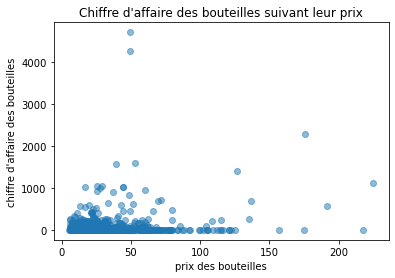

In [66]:
plt.scatter(erp.price, erp.CA, alpha= 0.5)
plt.xlabel("prix des bouteilles")
plt.ylabel("chiffre d'affaire des bouteilles")
plt.title("Chiffre d'affaire des bouteilles suivant leur prix")
plt.show();

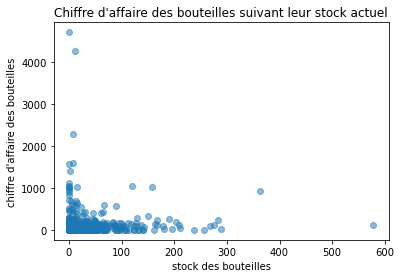

In [67]:
plt.scatter(erp.stock_quantity, erp.CA, alpha= 0.5)
plt.xlabel("stock des bouteilles")
plt.ylabel("chiffre d'affaire des bouteilles")
plt.title("Chiffre d'affaire des bouteilles suivant leur stock actuel")
plt.show();

On remarque que ce ne sont pas forcément les bouteilles les plus chères qui font le plus gros chiffre d'affaire. 

### Chiffre d'affaire Total <a class="anchor" id="III.a.2"></a>

In [68]:
erp.CA.sum()

70568.6

   Depuis la mise en place des ventes de bouteilles en lignes, l'entreprise a fait un chiffre d'affaire de 70k€. 

## b) Analyse des prix <a class="anchor" id="III.b"></a>

### Valeurs Extrêmes <a class="anchor" id="III.b.1"></a>

In [69]:
erp.price.sort_values(ascending= True).head(30)

755    5.2
189    5.7
664    5.7
188    5.7
190    5.7
665    5.8
209    5.8
210    5.8
666    5.8
386    6.3
496    6.5
629    6.5
454    6.5
216    6.7
435    6.8
150    6.8
492    7.0
511    7.0
642    7.1
513    7.1
387    7.1
569    7.2
423    7.4
431    7.4
542    7.5
217    7.6
181    7.6
15     7.7
187    7.8
437    7.8
Name: price, dtype: float64

In [70]:
erp.price.sort_values(ascending= False).head(30)

291    225.0
525    217.5
692    191.3
310    176.0
657    175.0
313    157.0
478    137.0
752    135.0
293    126.5
615    124.8
708    122.0
764    121.0
767    121.0
758    116.4
763    115.0
766    115.0
709    114.0
538    112.0
320    109.6
311    108.5
757    105.6
530    105.0
531    105.0
314    104.0
477    102.3
154    100.0
765     99.0
707     93.0
605     92.0
156     88.4
Name: price, dtype: float64

### Centrale <a class="anchor" id="III.b.2"></a>

In [71]:
moyenne= erp.price.mean()
moyenne

32.49313725490197

La valeur moyenne est de 32,50€

In [72]:
median= erp.price.median()
median

23.55

La valeur médiane se trouve à 23,55€ 

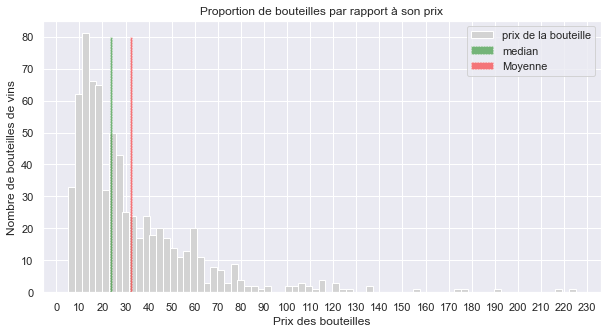

In [73]:
xmedian= pd.DataFrame([median],columns=['valeur'], index=['median'])
xmoyen= pd.DataFrame([moyenne],columns=['valeur'], index=['moyenne'])

sns.set()
plt.figure(figsize=(10,5))
erp.price.hist(bins=75, align='mid', color='lightgray', width= 3)
plt.xticks([10*i for i in range(25)])
plt.ylabel('Nombre de bouteilles de vins')
plt.xlabel('Prix des bouteilles')
plt.title('Proportion de bouteilles par rapport à son prix')

plt.bar(xmedian.valeur, color=['green'] ,height=80, linestyle='dotted', alpha=0.5)
plt.bar(xmoyen.valeur, color=['red'] ,height=80, linestyle='dotted', alpha=0.5)
plt.legend(['prix de la bouteille','median', 'Moyenne'])

plt.show()

### Forme <a class="anchor" id="III.b.3"></a>

In [74]:
erp.price.skew()

2.58090126300337

La répartition se retrouve plutôt sur la droite par rapport à la moyenne avec des prix plus élevés.

In [75]:
erp.price.kurtosis()

10.088392064977288

Les prix ne sont pas symétriques avec une distribution normale plutôt concentré.

### Concentration <a class="anchor" id="III.b.4"></a>

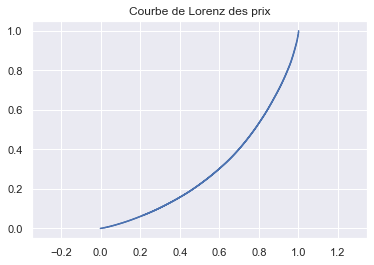

In [76]:
Lorenz= np.cumsum(np.sort(erp.price))/ erp.price.sum()
Lorenz = np.append([0], Lorenz)
plt.axes().axis('equal')
n= len(erp.price)
Xaxis= np.linspace(0-1/n, 1+1/n, n+1)
plt.plot(Xaxis, Lorenz, drawstyle='steps-post')
plt.title('Courbe de Lorenz des prix');

In [77]:
AUC = (Lorenz.sum()-Lorenz[-1]/2 -Lorenz[0]/2)/n
S= 0.5 - AUC
Gini = 2*S
Gini

0.4058015626973114

un déséquilibre de répartition. 

### Dispersion <a class="anchor" id="III.b.5"></a>

#### Ecart Type Empirique <a class="anchor" id="III.b.5.1"></a>

In [78]:
erp.price.var(ddof=0)

772.3420677486691

In [79]:
erp.price.std(ddof=0)

27.791042941002935

avec un écart type moyen de 27,8€ par rapport à la moyenne. 

#### Ecart interquartiles <a class="anchor" id="III.b.5.2"></a>

In [80]:
Q1= erp.price.quantile(0.25)
Q2= erp.price.quantile(0.5)
Q3= erp.price.quantile(0.75)
Q1, Q2, Q3

(14.1, 23.55, 42.175000000000004)

Pour pouvoir déterminer l'interquartile, j'ai d'abord calculé les 3 premiers quartiles à 25% des effectifs, 50% des effectifs et 75% des effectifs qui sont donc de 14€, 23 € (la médiane) et 42€.

In [81]:
#interquartile
IQ= Q3-Q1
IQ

28.075000000000003

A partir de quartiles, j'ai pu déterminer l'écart en faisant la différence entre le 3e et le 1e. Elle se rapproche de mon autre calcul de l'écart type empirique. On a donc une dispersion de 27-28€ par rapport à la médiane.

#### Outliers <a class="anchor" id="III.b.5.3"></a>

In [82]:
#déterminer la limite pour un outlier
Min= Q1-(1.5*IQ)
Max= Q3+(1.5*IQ)
Min, Max

(-28.012500000000003, 84.28750000000001)

In [83]:
erp.price[erp['price']<= Min].shape[0]

0

In [84]:
erp.price[erp['price']>= Max].sort_values(ascending=False).shape[0]

32

Après avoir déterminer l'interquartile des prix, nous avons pu calculer la valeur minimum et maximum suite son interquartile. Ce calcul permet de déterminer et détecter de potentiels outliers se trouvant au-dessous ou au-dessus de ces valeurs.
Nous avons donc du voir que le prix Max pour rester dans les normes ne devrait pas dépasser 84€. 
Nous avons donc 32 produits au-dessus des normes. 

In [85]:
outliers= erp[erp['price']>= Max][['product_id','price', 'stock_quantity', 'stock_status','post_title', 'CA' ]].sort_values(by=['price'],ascending=False)
outliers

,product_id,price,stock_quantity,stock_status,post_title,CA
291,4352,225.0,0,outofstock,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
525,5001,217.5,20,instock,David Duband Charmes-Chambertin Grand Cru 2014,0.0
692,5892,191.3,10,instock,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,573.9
310,4402,176.0,8,instock,Cognac Frapin VIP XO,2288.0
657,5767,175.0,12,instock,Camille Giroud Clos de Vougeot 2016,0.0
313,4406,157.0,3,instock,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0
478,4904,137.0,13,instock,Domaine Des Croix Corton Charlemagne Grand Cru...,685.0
752,6126,135.0,10,instock,Champagne Gosset Célébris Vintage 2007,270.0
293,4355,126.5,2,instock,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
615,5612,124.8,12,instock,Domaine Weinbach Gewurztraminer Grand Cru Furs...,0.0


In [86]:
(outliers.CA.sum() / erp.CA.sum()) *100

9.876914094937407

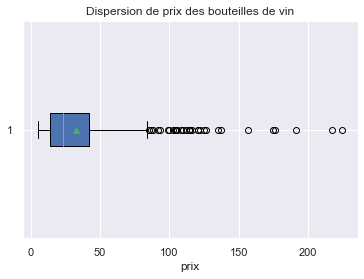

In [87]:
plt.boxplot(erp.price, showfliers=True,vert = False,
            patch_artist= True,  
            showmeans= True);
plt.xlabel('prix')
plt.title('Dispersion de prix des bouteilles de vin');

En étudiant de plus près ces potentiels outliers, on remarques que ces valeurs ne sont pas réellement des anomalies. En effet, on constate que ce sont simplement des vins haut de gammes avec un prix assez élevé par rapport à la norme des autres bouteilles de vins. Les prix de ces bouteilles sont atypiques mais ils correspondent avec le prix du marché actuel.

Ces bouteilles ont tout de même de la valeur dans notre analyse car elles représentent tout de même une part importante du chiffre d'affaire du site Internet.

Au niveau des valeurs aberrantes en anomalies, on constate qu'il n'y a pas de prix négatifs ni de réelles erreurs de saisies. 

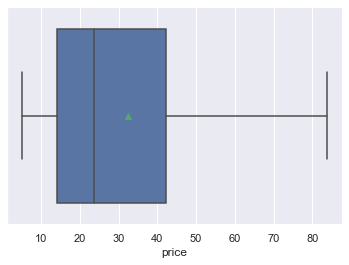

In [88]:
sns.boxplot(x='price', showfliers=False, showmeans= True,data=erp);

# CONCLUSION <a class="anchor" id="IV"></a>

Continuer à inciter la clientèle a acquérir des bouteilles de vins sur le site Internet. 
Faire un tri sur les bouteilles les plus demandées, et réduire le stock pour les bouteilles les moins vendues. 
Continuer à proposer des produits de hauts gammes de meilleurs qualités. et pourquoi pas tenter un developpement sur le marché Internationnal.